# Understanding Confusion Matrices and ROC Curves

Let's do some hands-on exploring. To make sure we don't take things too seriously, today's algorithm is testing if something is a Kangaroo ${\large 🦘}$ or not ${\large 🏭}$!

![Error Types](https://imgs.xkcd.com/comics/error_types.png)

## The Confusion Matrix

<p>The confusion matrix is a table layout that makes it easier to visualize the performance of a machine learning algorithm's classification ability.</p>
<br />

<p>
$\begin{aligned}
&\begin{array}{|c|c|c|}
\hline
& Actual\,Positive & Actual\,Negative\\
\hline
Predicted\,Positive & {\small True\,Positive} & {\small False\,Positive} \\
\hline
Predicted\,Negative & {\small False\,Negative} & {\small True\,Negative} \\
\hline
\end{array}
\end{aligned}$
</p>
<br />

You may recognize False Positives as Type I errors and False Negatives as Type 2 errors.

### Terminology

One of the more confusing aspects of the confusion matrix is the confusion of terminology that is used interchangeably between tutorials.

#### Sensitivity
aka "Recall" aka "Hit Rate" aka "True Positive Rate" aka <b>TPR</b>

$$\frac{TP}{TP\,+\,FN} = \frac{is\,{\large 🦘}}{is\,{\large 🦘}\,+\,isn't\,{\large 🏭}}$$

<br />
<br />

#### Specificity
aka "Selectivity" aka "True Negative Rate" aka <b>TNR</b>

$$\frac{TN}{TN\,+\,FP} = \frac{is\,{\large 🏭}}{is\,{\large 🏭}\,+\,isn't\,{\large 🦘}}$$

<br />


#### False Positive Rage
aka "Fall Out" aka <b>FPR</b>

$$\frac{FP}{FP\,+\,TN} = \frac{isn't\,{\large 🦘}}{isn't\,{\large 🦘}\,+\,is\,{\large 🏭}}$$

<br />

#### Accuracy
This one doesn't have any weird names

$$\frac{TP\,+\,TN}{TP\,+\,TN\,FP\,+\,FN} = \frac{is\,{\large 🦘}\,+\,is\,{\large 🏭}}{is\,{\large 🦘}\,+\,is\,{\large 🏭}\,+\,isn't\,{\large 🦘}\,+\,isn't\,{\large 🏭}}$$

<br />

#### Kangaroo vs Factory Confusion Matrix
$\begin{aligned}
&{\large} \\
&\begin{array}{|c|c|c|}
\hline
 & Actual\,{\large 🦘} & Actual\,{\large 🏭\,} \\
\hline
Predicted\,{\large 🦘} & is\,{\large 🦘} & isn't\,{\large 🦘} \\
\hline
Predicted\,{\large 🏭\,} & isn't\,{\large 🏭} & is\,{\large 🏭} \\
\hline
\end{array}
\end{aligned}$


#### The Hands-On Part
Follow the steps below to customize our outputs and learn how these variables work together.

In the next code block, change the numbers for the different contingency table (aka Confusion Matrix) values, and run the block to see how our calculations change.

<i>Running The Code Block:</i> Pressing [Shift + Enter] is power-user mode, but you can also use the "▶ Run" button at the top of the screen.


In [1]:
TP = 1  # True Positive  = is 🦘
FP = 2  # False Positive = isn't 🦘
TN = 3  # True Negative  = is 🏭
FN = 7  # False Negative = isn't 🏭

sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)
false_positive_rate=FP/(FP+TN)

# code to display the resulting confusion matrix and sensitivity/specificity
from IPython.display import display, Latex
display(Latex(rf'$\begin{{array}}{{|c|c|c|}} \hline \\ & Actual\,🦘 & Actual\,🏭 \\ \hline \\ Predicted\,🦘 & {TP} & {FP} \\ \hline \\ Predicted\,🏭 & {FN} & {TN} \\ \hline \end{{array}}$'))
display(Latex(rf'$Sensitivity = \dfrac{{{TP}}}{{{TP+FN}}} = {sensitivity}$'))
display(Latex(rf'$Specificity = \dfrac{{{TN}}}{{{TN+FP}}} = {specificity}$'))
display(Latex(rf'$Accuracy = \dfrac{{{FP}}}{{{FP+TN}}} = {false_positive_rate}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<i>Extra Credit:</i> What would happen to <i>accuracy</i> if we made FP really high? Why?

## The Receiver Operating Characteristic and Area Under Curve

A receiver operating characteristic curve (ROC curve), is a graphical plot that illustrates the diagnostic ability of a binary classifier system as it's discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR aka "is 🦘 ratio") against the false positive rate (FPR aka "isn't 🦘 ratio") at various threshold settings.

<br />

### Sensitivity (FPR) & 1 - Specificity (TPR) equations
$$True\,Positive\,Rate = Sensitivity = TPR = \frac{TP}{TP+FN} = \frac{is\,{\large 🦘}}{is\,{\large 🦘}\,+\,isn't\,{\large 🏭}}$$

<br />

$$False\,Positive\,Rate = FPR = 1 - Specificity = \frac{FP}{TN+FP} = \frac{isn't\,{\large 🦘}}{is\,{\large 🏭}\,+\,isn't\,{\large 🦘}}$$

The equations in the next code block will use the values you set up above to calculate the TPR and FPR, but you can set them manually if you like.

In [2]:
TPR = TP/(TP+FN) # True Positive Rate
FPR = FP/(TN+FP) # False Positive Rate

display(Latex(rf'$True\,Positive\,Rate = \dfrac{{{TP}}}{{{TP+FN}}} = {TPR}$'))
display(Latex(rf'$False\,Positive\,Rate = \dfrac{{{FP}}}{{{TN+FP}}} = {FPR}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### The Threshold value

When our machine learning model is given an input, it generates a number (always between 0.0 and 1.0) that represents its belief in how likely it is that the input is a kangaroo 🦘.

The threshold value is one that we choose, and it determines which guesses we think are good enough. Where we set that threshold determines the sensitivity and specificity of the model.

The ROC curve is a graphical representation of the sensitivity and specificity for a range of possible threshold values.


#### The Hands-On Part

Set a threshold value below and run the cell to see the resulting

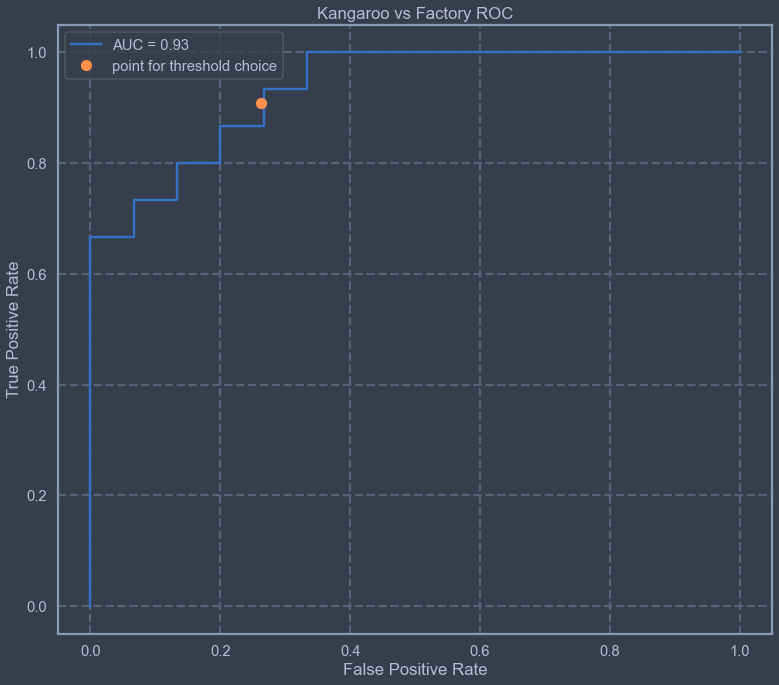

Threshold values where the first assumes everything is a factory 🏭, and the last value assumes everything is a kangaroo 🦘
[1.95  0.95  0.725 0.7   0.675 0.65  0.625 0.6   0.575 0.55  0.525 0.5
 0.475 0.2  ]


In [20]:
threshold = 0.70  # the cutoff point for 🦘

# code for displaying the ROC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, auc
from jupyterthemes import jtplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
jtplot.style(context='poster', fscale=1.4, gridlines='--')

y_truth = ['🦘', '🦘', '🦘', '🦘', '🦘', '🦘', '🦘', '🦘', '🦘', '🦘', '🏭', '🦘', '🏭', '🦘', '🏭', '🦘', '🏭', '🦘', '🏭', '🦘', '🏭', '🏭', '🏭', '🏭', '🏭', '🏭', '🏭', '🏭', '🏭', '🏭']
predictions = [ 0.95, 0.925, 0.90, 0.875, 0.85, 0.825, 0.80, 0.775, 0.750, 0.725, 0.7, 0.675, 0.65, 0.625, 0.6, 0.575, 0.55, 0.525, 0.50, 0.475, 0.45, 0.425, 0.4, 0.375, 0.35, 0.3, 0.275, 0.25, 0.225, 0.2 ]
choice_at_threshold = ['🦘' if i >= threshold else '🏭' for i in predictions]
true_kangaroo = [i == j and i == '🦘' for i, j in zip(y_truth, choice_at_threshold)]
true_factory = [i == j and i == '🏭' for i,j in zip(y_truth, choice_at_threshold)]
false_kangaroo = [i != j and i == '🦘' for i,j in zip(y_truth, choice_at_threshold)]
false_factory = [i != j and i == '🏭' for i,j in zip(y_truth, choice_at_threshold)]
true_kangaroo_ratio = np.sum(true_kangaroo)/(np.sum(true_kangaroo)+np.sum(false_factory))
false_kangaroo_ratio = np.sum(false_kangaroo)/(np.sum(true_factory)+np.sum(false_kangaroo))

fpr, tpr, thresholds = roc_curve(y_truth, predictions, pos_label='🦘')
display = RocCurveDisplay(fpr, tpr, roc_auc=auc(fpr, tpr))
display.plot()
plt.plot(false_kangaroo_ratio, true_kangaroo_ratio, 'yo', label='point for threshold choice')
plt.title("Kangaroo vs Factory ROC")
plt.legend()
plt.show()

Running the next cell will show an array of threshold values where the first entry will assume everything is a factory 🏭, and the last entry will assume everything is a kangaroo 🦘. Try setting your threshold value to a one of these and see where it lands on the ROC curve.

In [ ]:
print(thresholds)

Run the cell below to see the confusion matrix for your threshold choice.

The confusion matrix will print like this:
```python
[[TP, FP]
 [FN, TN]]
```

In [4]:
tn, fp, fn, tp = confusion_matrix(y_truth, choice_at_threshold).ravel()
cm = np.asarray([[tp, fp], [fn, tn]])
print(f'Confusion matrix at threshold value {threshold}:')
print()
print(cm)

Confusion matrix at threshold value 0.7:

[[10  1]
 [ 5 14]]


What happened when we changed the threshold? What real world impact could this have?
